In [90]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('minimal')

from understat import Understat

import asyncio
import json
import aiohttp
import nest_asyncio
nest_asyncio.apply()

In [91]:
playerid = 822
filters = {'season' : '2022'}

async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player = await understat.get_player_shots(
            playerid, filters
        )
        return json.dumps(player)

loop = asyncio.get_event_loop()
x = loop.run_until_complete(main())

In [92]:
df = pd.read_json(x)
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479268,18,SavedShot,0.692,0.312,0.013016,Patrick Bamford,h,822,OpenPlay,2022,RightFoot,18205,Leeds,Wolverhampton Wanderers,2,1,2022-08-06 14:00:00,Marc Roca,Pass
1,479289,79,SavedShot,0.927,0.528,0.413904,Patrick Bamford,h,822,OpenPlay,2022,Head,18205,Leeds,Wolverhampton Wanderers,2,1,2022-08-06 14:00:00,Jack Harrison,Cross
2,480328,11,BlockedShot,0.950,0.620,0.109238,Patrick Bamford,a,822,OpenPlay,2022,LeftFoot,18215,Southampton,Leeds,2,2,2022-08-13 14:00:00,Rodrigo,Pass
3,480329,16,MissedShots,0.962,0.614,0.113331,Patrick Bamford,a,822,OpenPlay,2022,LeftFoot,18215,Southampton,Leeds,2,2,2022-08-13 14:00:00,Rodrigo,Pass
4,484961,89,MissedShots,0.898,0.475,0.101930,Patrick Bamford,h,822,OpenPlay,2022,LeftFoot,18245,Leeds,Everton,1,1,2022-08-30 19:00:00,Pascal Struijk,Cross
5,485944,48,MissedShots,0.916,0.312,0.047463,Patrick Bamford,a,822,OpenPlay,2022,LeftFoot,18257,Brentford,Leeds,5,2,2022-09-03 14:00:00,None,None
6,485952,77,MissedShots,0.972,0.488,0.864625,Patrick Bamford,a,822,OpenPlay,2022,RightFoot,18257,Brentford,Leeds,5,2,2022-09-03 14:00:00,Pascal Struijk,Pass
7,490939,77,SavedShot,0.961,0.716,0.050839,Patrick Bamford,h,822,OpenPlay,2022,LeftFoot,18286,Leeds,Aston Villa,0,0,2022-10-02 15:30:00,Júnior Firpo,Pass
8,492075,12,BlockedShot,0.789,0.346,0.033968,Patrick Bamford,a,822,OpenPlay,2022,LeftFoot,18296,Crystal Palace,Leeds,2,1,2022-10-09 13:00:00,Tyler Adams,Pass
9,492077,20,SavedShot,0.844,0.490,0.344524,Patrick Bamford,a,822,OpenPlay,2022,LeftFoot,18296,Crystal Palace,Leeds,2,1,2022-10-09 13:00:00,Tyler Adams,Throughball


In [93]:
outs = []
for i in range(100000):
    outs.append(np.random.binomial(1, df.xG).sum().tolist())

goals = len(df.query('result == "Goal"'))

In [94]:
df2 = pd.DataFrame(outs)
df2 = df2.value_counts(normalize=1).sort_index().to_frame(name = 'Goals')
df2.index = df2.index.map(lambda x: x[0])
#df2 = df2.query("Goals >= 0.005")
df2

,Goals
0,0.00028
1,0.00444
2,0.02634
3,0.08374
4,0.16521
5,0.22189
6,0.21136
7,0.15080
8,0.08376
9,0.03536


/tmp/ipykernel_451044/3035594787.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


()

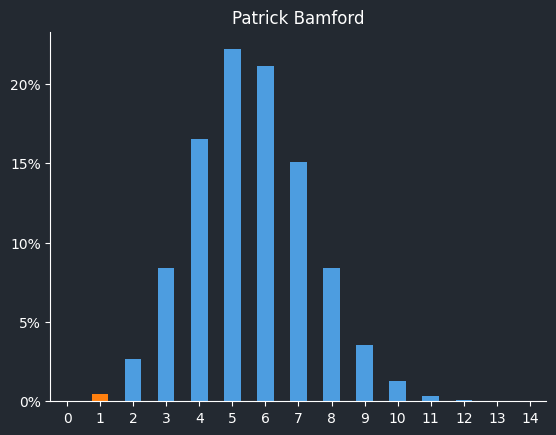

In [95]:
colors = ['C0'] * len(df2)
colors[df2.index.get_loc(goals)] = 'C1'

df2.plot.bar(y = 0,color=colors, legend=False, title=df.player[0])
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.xticks(rotation=0)
()